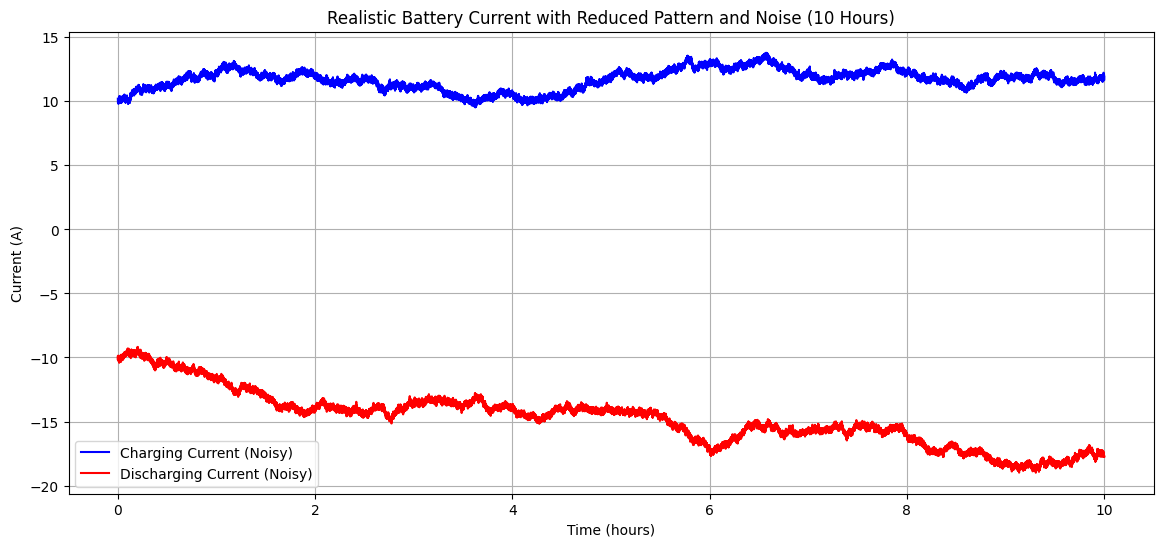

Signals saved to battery_current_signals.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
nominal_capacity = 20.0  # Ah
simulation_hours = 10  # Simulate for 10 hours

# Simulation time
time = np.linspace(0, simulation_hours * 3600, simulation_hours * 3600 + 1)  # 10 hours, 1-second intervals

# Generate more realistic charging and discharging current signals
# Using a random walk with a general trend
charging_current = np.cumsum(np.random.normal(0, 0.02, size=len(time))) + nominal_capacity * 0.5
discharging_current = -np.cumsum(np.random.normal(0, 0.02, size=len(time))) - nominal_capacity * 0.5

# Adding a slight trend to simulate the overall charging/discharging process
charging_current = charging_current + 0.01 * time / max(time) * nominal_capacity
discharging_current = discharging_current - 0.01 * time / max(time) * nominal_capacity

# Clamp current values to realistic ranges
charging_current = np.clip(charging_current, 0, nominal_capacity)
discharging_current = np.clip(discharging_current, -nominal_capacity, 0)

# Add Gaussian noise to simulate sensor errors
noise_factor_current = 0.005  # 0.5% noise

charging_current_noisy = charging_current + noise_factor_current * nominal_capacity * np.random.normal(size=charging_current.shape)
discharging_current_noisy = discharging_current + noise_factor_current * nominal_capacity * np.random.normal(size=discharging_current.shape)

# Combine the signals into a DataFrame
data = {
    'Time (s)': time,
    'Charging Current (A)': charging_current_noisy,
    'Discharging Current (A)': discharging_current_noisy
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = 'battery_current_signals.csv'
df.to_csv(csv_filename, index=False)

# Plot the signals
plt.figure(figsize=(14, 6))

plt.plot(time / 3600, charging_current_noisy, label='Charging Current (Noisy)', color='blue')
plt.plot(time / 3600, discharging_current_noisy, label='Discharging Current (Noisy)', color='red')
plt.xlabel('Time (hours)')
plt.ylabel('Current (A)')
plt.legend()
plt.title('Realistic Battery Current with Reduced Pattern and Noise (10 Hours)')
plt.grid(True)
plt.show()

print(f"Signals saved to {csv_filename}")
